In [1]:
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow import random

In [2]:
vgg_model = keras.applications.vgg16.VGG16(weights='.../VGG16/vgg16_weights_tf_dim_ordering_tf_kernels_3.h5')

In [3]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
last_layer = str(vgg_model.layers[-1])

np.random.seed(42)
random.set_seed(42)
classifier= Sequential()
for layer in vgg_model.layers:
    if str(layer) != last_layer:
        classifier.add(layer)

In [5]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [6]:
for layer in classifier.layers:
    layer.trainable=False

In [7]:
classifier.add(Dense(1, activation='sigmoid'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [8]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

generate_train_data = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

generate_test_data = ImageDataGenerator(rescale =1./255)

In [10]:
training_dataset = generate_train_data.flow_from_directory('.../training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_datasetset = generate_test_data.flow_from_directory('.../test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 10764 images belonging to 2 classes.
Found 2674 images belonging to 2 classes.


In [11]:
classifier.fit(training_dataset,
               steps_per_epoch = 100,
               epochs = 10,
               validation_data = test_datasetset,
               validation_steps = 30,
               shuffle=False)

Epoch 1/10
100/100 [==============================] - 1083s 11s/step - loss: 0.4706 - accuracy: 0.7889 - val_loss: 0.2838 - val_accuracy: 0.8875
Epoch 2/10
100/100 [==============================] - 1094s 11s/step - loss: 0.2978 - accuracy: 0.8764 - val_loss: 0.2484 - val_accuracy: 0.9031
Epoch 3/10
100/100 [==============================] - 1085s 11s/step - loss: 0.2583 - accuracy: 0.8940 - val_loss: 0.2825 - val_accuracy: 0.8906
Epoch 4/10
100/100 [==============================] - 1099s 11s/step - loss: 0.2424 - accuracy: 0.9067 - val_loss: 0.2553 - val_accuracy: 0.8948
Epoch 5/10
100/100 [==============================] - 1092s 11s/step - loss: 0.2443 - accuracy: 0.9008 - val_loss: 0.2517 - val_accuracy: 0.8917
Epoch 6/10
100/100 [==============================] - 1098s 11s/step - loss: 0.2259 - accuracy: 0.9040 - val_loss: 0.2247 - val_accuracy: 0.9052
Epoch 7/10
100/100 [==============================] - 1098s 11s/step - loss: 0.2513 - accuracy: 0.8981 - val_loss: 0.2213 - val_ac

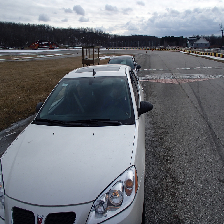

In [12]:
import numpy as np
from keras.preprocessing import image
new_image = image.load_img('.../Prediction/test_image_2.jpg', target_size = (224, 224))
new_image

In [13]:
training_dataset.class_indices

{'car': 0, 'flower': 1}

In [14]:
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis = 0)
result = classifier.predict(new_image)

if result[0][0] == 1:
    prediction = 'It is a flower'
else:
    prediction = 'It is a car'

print(prediction)

It is a car


In [15]:
classifier.save('car-flower-classifier.h5')